# Breast Cancer Classification using TPOT


#### This project utilizes TPOT, an automated machine learning (AutoML) library, to build and optimize a classification model for breast cancer diagnosis using a subset of features from the dataset.

#!pip install tpot pandas scikit-learn


## 1. Import Libraries

In [1]:
import pandas as pd  # For data manipulation
from tpot import TPOTClassifier  # For automated machine learning
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation metrics
import matplotlib.pyplot as plt  # For plotting
from sklearn.inspection import permutation_importance  # For feature importance analysis
import seaborn as sns  # For visualization
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
import pickle  # For saving the trained model


C:\Users\fofoh\anaconda3\envs\oumi\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


## 2. Load and Preprocess the Dataset

### Step 2.1: Load the Dataset

##### Load and Preprocess the Dataset
This dataset contains features related to breast cancer diagnosis, including various metrics like radius, texture, and area.
You can download the dataset from [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).


In [2]:
# Ensure the path is correct
df = pd.read_csv(r'C:\Users\fofoh\Desktop\Automated Machine Learning for Breast Cancer Diagnosis Using TPOT\data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Step 2.2: Drop Unnecessary Columns

We drop the Unnamed: 32 and id columns as they don't provide meaningful information for the classification task.

In [4]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [5]:
print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Step 2.3: Select Features and Target Variable

We use a subset of features for the classification task and map the diagnosis column to binary values (M for Malignant = 1, B for Benign = 0).

In [6]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

In [7]:
X = df[selected_features]
y = df['diagnosis'].map({'M': 1, 'B': 0}) 

## 3. Split the Data into Training and Test Sets

We split the data into training (80%) and test (20%) sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Train the TPOT Classifier

### Step 4.1: Initialize and Train the TPOT Model

We use the TPOTClassifier to automatically optimize the machine learning pipeline.

TPOT is an open-source Python tool that automates the process of designing and optimizing machine learning pipelines using genetic programming. It leverages evolutionary algorithms to find the best models and preprocessing steps for a given dataset, making it a powerful tool for both beginners and experienced data scientists.

##### Key Features
- **Automated Machine Learning**: TPOT can automatically find the best models and parameters for your data.
- **Genetic Programming**: It uses genetic algorithms to evolve pipelines and select optimal models.
- **Easy Integration**: Works seamlessly with popular libraries such as scikit-learn.


For more details, you can visit the official TPOT documentation [here](https://epistasislab.github.io/tpot/).

In [9]:
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

In [10]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.923076923076923

Generation 2 - Current best internal CV score: 0.923076923076923

Generation 3 - Current best internal CV score: 0.923076923076923

Generation 4 - Current best internal CV score: 0.923076923076923

Generation 5 - Current best internal CV score: 0.923076923076923

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=18, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

## 5. Evaluate the Model

### Step 5.1: Make Predictions

In [11]:
y_pred = tpot.predict(X_test)

### Step 5.2: Calculate Accuracy

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9649122807017544


### Step 5.3: Confusion Matrix and Classification Report

#### Confusion Matrix:

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print( conf_matrix)

[[71  0]
 [ 4 39]]


#### Classification Report:

In [14]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### Step 5.4: Visualize the Confusion Matrix

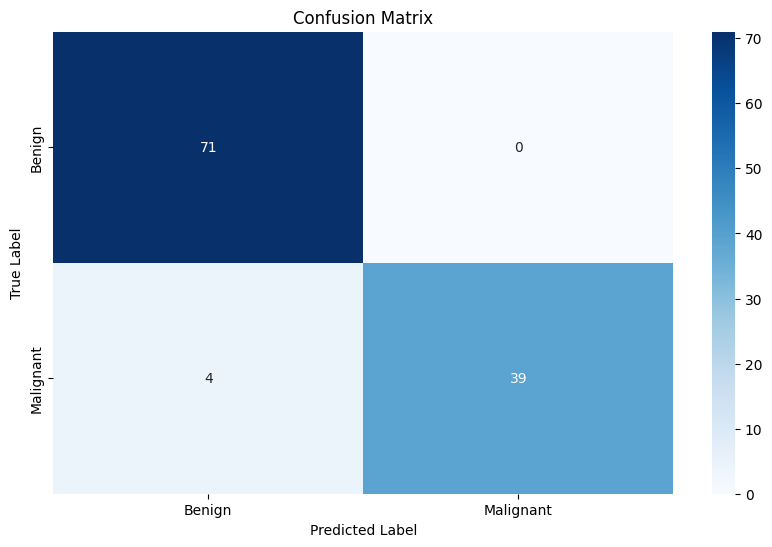

In [15]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## 6. Feature Importance

We compute the permutation feature importance to understand which features had the most impact on model performance.

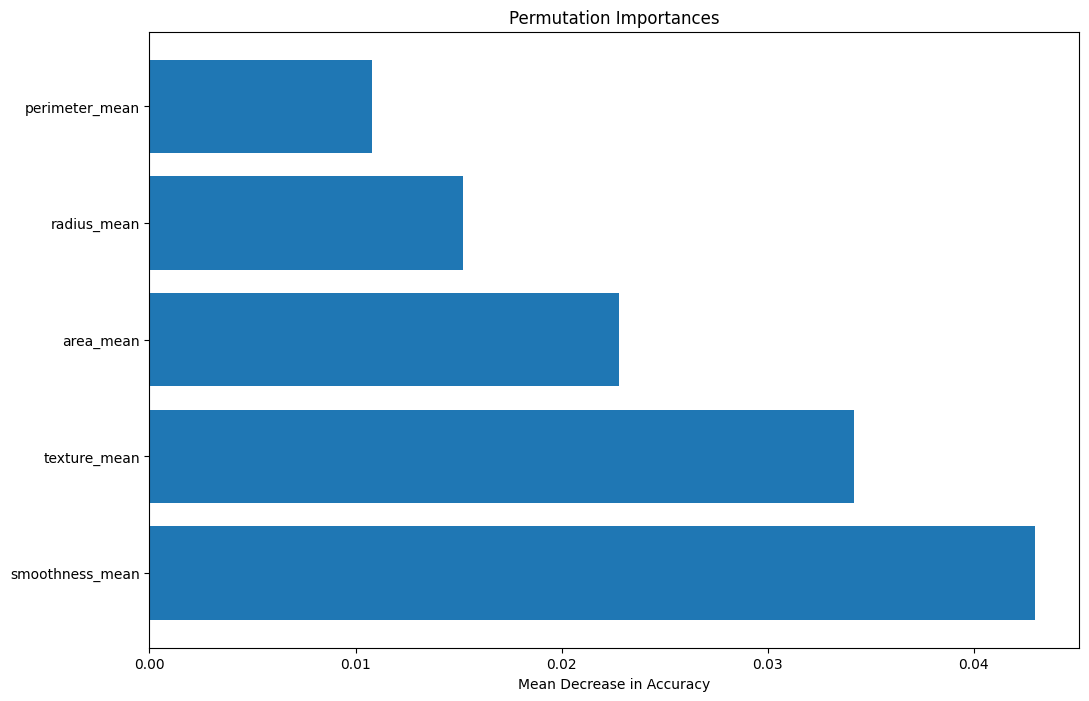

In [16]:
result = permutation_importance(tpot.fitted_pipeline_, X_test, y_test, n_repeats=30, random_state=42)

importances = result.importances_mean
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 8))
plt.title('Permutation Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Mean Decrease in Accuracy')
plt.show()


## 7. ROC Curve

We plot the Receiver Operating Characteristic (ROC) curve to evaluate the performance of the model.

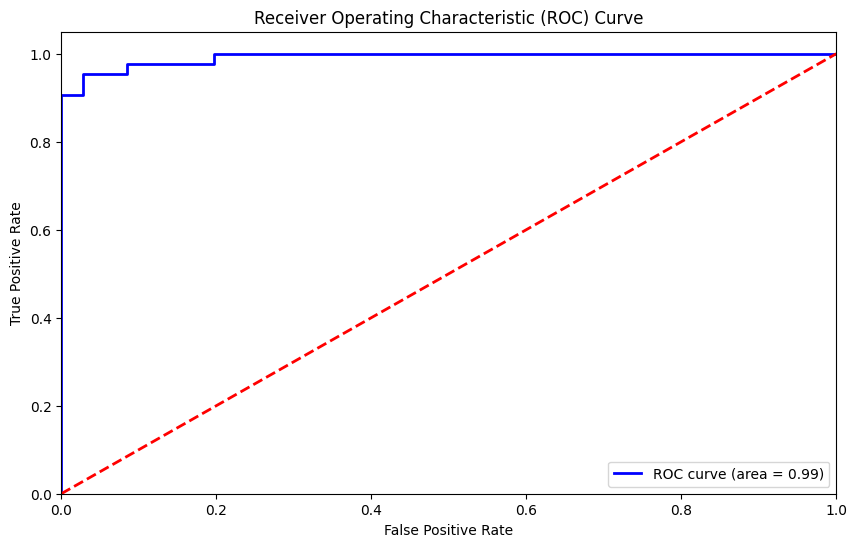

In [17]:
# Plotting the ROC Curve
y_prob = tpot.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 8. Precision-Recall Curve

We also plot the Precision-Recall curve to evaluate the balance between precision and recall.

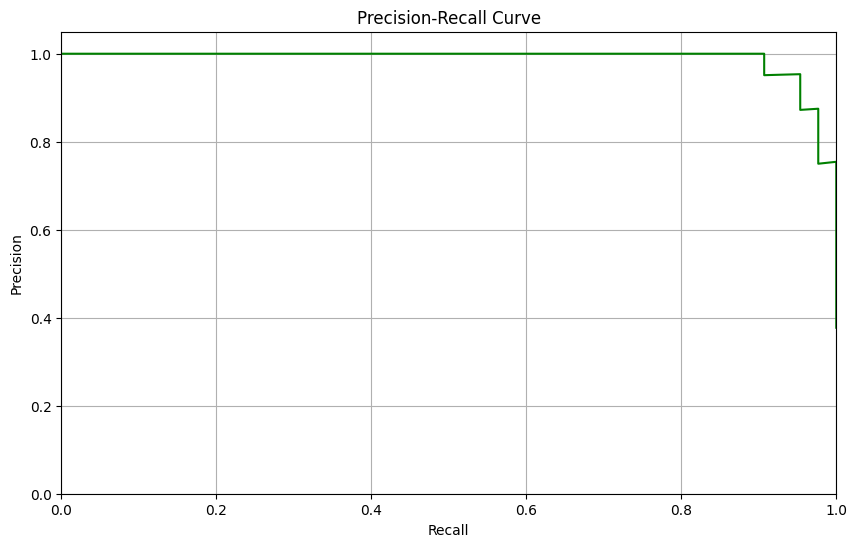

In [18]:
# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

## 9. Export the Model 

In [19]:
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(tpot.fitted_pipeline_, f)

### Step 9.3: Print the Best Pipeline and Score

In [20]:
# Best pipeline and score
print(f'Best pipeline: {tpot.fitted_pipeline_}')
print(f'Best score: {tpot.score(X_test, y_test):.4f}')

Best pipeline: Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_features=0.2, min_samples_leaf=8,
                                        min_samples_split=18,
                                        random_state=42))])
Best score: 0.9649
